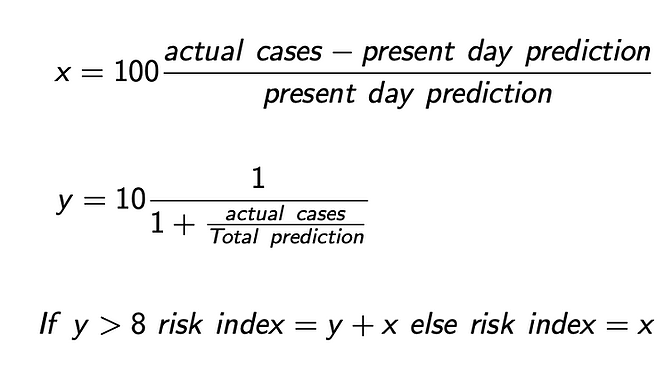

where actual cases = Daily actual cases

Total prediction = sum of predictions

In [ ]:
import pandas as pd
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/Covid Dashboard Project/Raw Data/RI_Calculation.csv')
df.columns = ['Date' , 'Actual' , 'Predicted']
df

,Date,Actual,Predicted
0,14.05.2020,163,138.951126
1,15.05.2020,106,137.196854
2,16.05.2020,202,137.549255
3,17.05.2020,201,137.154617
4,18.05.2020,102,139.603745
...,...,...,...
496,22.9.2021,170,190.022492
497,23.9.2021,171,176.511963
498,24.9.2021,121,154.876694
499,25.9.2021,171,152.896576


Total prediction = 439117.2

In [ ]:
#Calculating values of X and Y  
a = df["Actual"] - df["Predicted"]
df["X"] = (a / df["Predicted"])*100
b = (df["Actual"] / 439117.2) + 1 
df["Y"] = 10 / b
df

,Date,Actual,Predicted,X,Y
0,14.05.2020,163,138.951126,17.307434,9.996289
1,15.05.2020,106,137.196854,-22.738753,9.997587
2,16.05.2020,202,137.549255,46.856484,9.995402
3,17.05.2020,201,137.154617,46.549933,9.995425
4,18.05.2020,102,139.603745,-26.936057,9.997678
...,...,...,...,...,...
496,22.9.2021,170,190.022492,-10.536906,9.996130
497,23.9.2021,171,176.511963,-3.122714,9.996107
498,24.9.2021,121,154.876694,-21.873332,9.997245
499,25.9.2021,171,152.896576,11.840307,9.996107


In [ ]:
import numpy as np 
#Calculating RI
df["RI"] = np.where(df["Y"] > 8 , df["Y"] + df["X"], df["X"] )
df

,Date,Actual,Predicted,X,Y,RI
0,14.05.2020,163,138.951126,17.307434,9.996289,27.303723
1,15.05.2020,106,137.196854,-22.738753,9.997587,-12.741166
2,16.05.2020,202,137.549255,46.856484,9.995402,56.851886
3,17.05.2020,201,137.154617,46.549933,9.995425,56.545358
4,18.05.2020,102,139.603745,-26.936057,9.997678,-16.938380
...,...,...,...,...,...,...
496,22.9.2021,170,190.022492,-10.536906,9.996130,-0.540776
497,23.9.2021,171,176.511963,-3.122714,9.996107,6.873394
498,24.9.2021,121,154.876694,-21.873332,9.997245,-11.876087
499,25.9.2021,171,152.896576,11.840307,9.996107,21.836414


In [ ]:
df[df.Y <= 8] #that means all values of y are greater than 8

,Date,Actual,Predicted,X,Y,RI


In [ ]:
#Adding new columns
df["Low Risk"] = 0   
df["Medium Risk"] = 7.5
df["High Risk"] = 10
df

,Date,Actual,Predicted,X,Y,RI,Low Risk,Medium Risk,High Risk
0,14.05.2020,163,138.951126,17.307434,9.996289,27.303723,0,7.5,10
1,15.05.2020,106,137.196854,-22.738753,9.997587,-12.741166,0,7.5,10
2,16.05.2020,202,137.549255,46.856484,9.995402,56.851886,0,7.5,10
3,17.05.2020,201,137.154617,46.549933,9.995425,56.545358,0,7.5,10
4,18.05.2020,102,139.603745,-26.936057,9.997678,-16.938380,0,7.5,10
...,...,...,...,...,...,...,...,...,...
496,22.9.2021,170,190.022492,-10.536906,9.996130,-0.540776,0,7.5,10
497,23.9.2021,171,176.511963,-3.122714,9.996107,6.873394,0,7.5,10
498,24.9.2021,121,154.876694,-21.873332,9.997245,-11.876087,0,7.5,10
499,25.9.2021,171,152.896576,11.840307,9.996107,21.836414,0,7.5,10


In [ ]:
df[df.RI <= 7.5] #Low - medium risk

,Date,Actual,Predicted,X,Y,RI,Low Risk,Medium Risk,High Risk
1,15.05.2020,106,137.196854,-22.738753,9.997587,-12.741166,0,7.5,10
4,18.05.2020,102,139.603745,-26.936057,9.997678,-16.938380,0,7.5,10
13,27.05.2020,106,153.535507,-30.960595,9.997587,-20.963009,0,7.5,10
16,30.05.2020,108,134.182175,-19.512409,9.997541,-9.514868,0,7.5,10
18,1.06.2020,57,101.885330,-44.054753,9.998702,-34.056051,0,7.5,10
...,...,...,...,...,...,...,...,...,...
495,21.9.2021,159,174.593552,-8.931345,9.996380,1.065036,0,7.5,10
496,22.9.2021,170,190.022492,-10.536906,9.996130,-0.540776,0,7.5,10
497,23.9.2021,171,176.511963,-3.122714,9.996107,6.873394,0,7.5,10
498,24.9.2021,121,154.876694,-21.873332,9.997245,-11.876087,0,7.5,10


In [ ]:
df[df.Actual > 2000]

,Date,Actual,Predicted,X,Y,RI,Low Risk,Medium Risk,High Risk
115,6.09.2020,3002,1534.198486,95.672205,9.932100,105.604304,0,7.5,10
118,9.09.2020,2078,2203.747070,-5.706057,9.952901,4.246843,0,7.5,10
125,16.09.2020,2120,1561.457520,35.770584,9.951953,45.722538,0,7.5,10
307,17.3.2021,2587,1891.912354,36.739950,9.941431,46.681381,0,7.5,10
308,18.3.2021,2752,2330.937988,18.064059,9.937719,28.001778,0,7.5,10
309,19.3.2021,2834,2806.106201,0.994039,9.935875,10.929915,0,7.5,10
310,20.3.2021,3111,2851.570313,9.097783,9.929652,19.027435,0,7.5,10
311,21.3.2021,2900,2924.926025,-0.852193,9.934392,9.082198,0,7.5,10
312,22.3.2021,2342,2107.153564,11.145198,9.946949,21.092147,0,7.5,10
313,23.3.2021,3098,2718.673340,13.952638,9.929944,23.882582,0,7.5,10


In [ ]:
df[df.RI >= 7.5] #Medium - High risk

,Date,Actual,Predicted,X,Y,RI,Low Risk,Medium Risk,High Risk
0,14.05.2020,163,138.951126,17.307434,9.996289,27.303723,0,7.5,10
2,16.05.2020,202,137.549255,46.856484,9.995402,56.851886,0,7.5,10
3,17.05.2020,201,137.154617,46.549933,9.995425,56.545358,0,7.5,10
5,19.05.2020,149,142.389252,4.642730,9.996608,14.639338,0,7.5,10
6,20.05.2020,152,142.917953,6.354728,9.996540,16.351267,0,7.5,10
...,...,...,...,...,...,...,...,...,...
486,12.9.2021,196,184.891419,6.008165,9.995538,16.003703,0,7.5,10
488,14.9.2021,178,180.786179,-1.541146,9.995948,8.454802,0,7.5,10
489,15.9.2021,199,200.865509,-0.928735,9.995470,9.066735,0,7.5,10
490,16.9.2021,215,198.141983,8.508049,9.995106,18.503155,0,7.5,10


In [ ]:
df[df.RI >= 7.5].to_csv('med-high risk.csv')

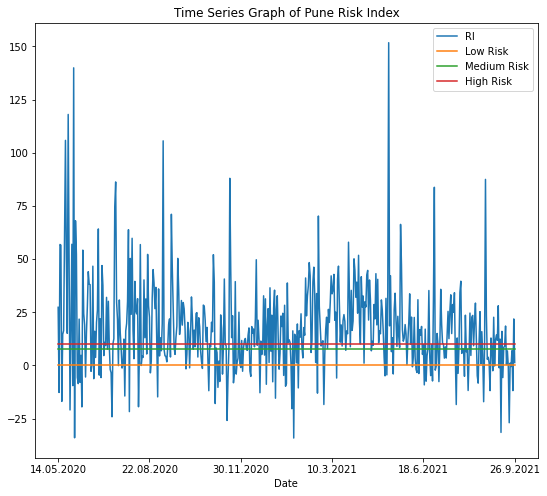

In [ ]:
import matplotlib.pyplot as plt
df.plot(x="Date", y=["RI","Low Risk","Medium Risk","High Risk"],figsize = (9,8))    
plt.title("Time Series Graph of Pune Risk Index")
plt.show()

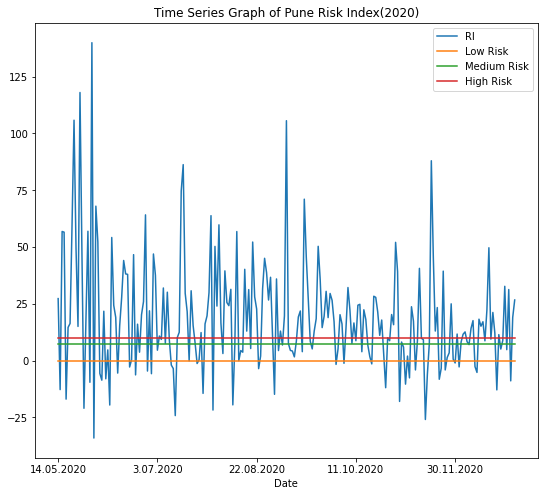

In [ ]:
df[:231].plot(x="Date", y=["RI","Low Risk","Medium Risk","High Risk"],figsize = (9,8))    
plt.title("Time Series Graph of Pune Risk Index(2020)")
plt.show()

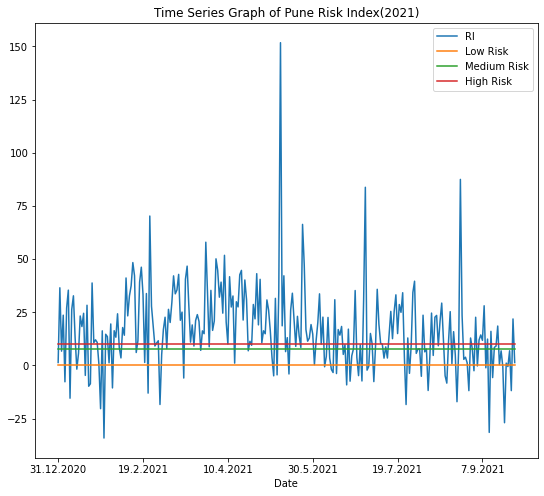

In [ ]:
df[231:].plot(x="Date", y=["RI","Low Risk","Medium Risk","High Risk"],figsize = (9,8))    
plt.title("Time Series Graph of Pune Risk Index(2021)")
plt.show()

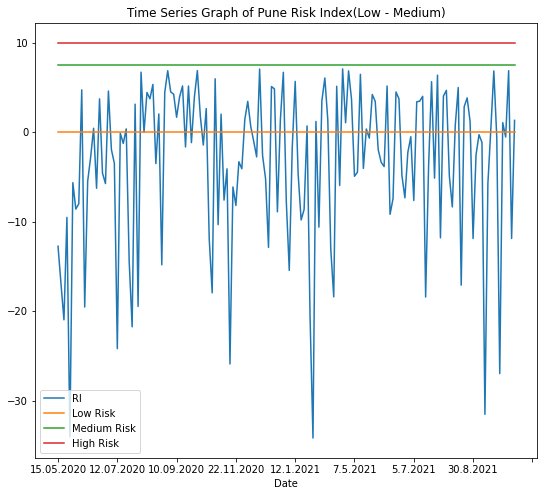

In [ ]:
df[df.RI <= 7.5 ].plot(x="Date", y=["RI","Low Risk","Medium Risk","High Risk"],figsize = (9,8))    
plt.title("Time Series Graph of Pune Risk Index(Low - Medium)")
plt.show()

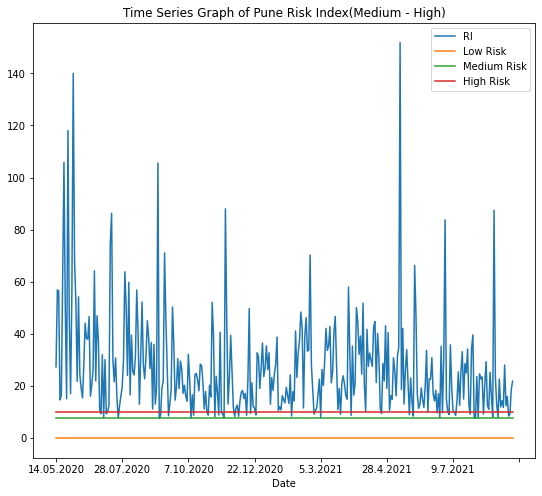

In [ ]:
df[df.RI >= 7.5 ].plot(x="Date", y=["RI","Low Risk","Medium Risk","High Risk"],figsize = (9,8))    
plt.title("Time Series Graph of Pune Risk Index(Medium - High)")
plt.show()